In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

In [ ]:
df = pd.read_csv("Jan_2020_ontime.csv", engine="python", error_bad_lines=False)
label_encoder = preprocessing.LabelEncoder()
cols = list(df.columns.values)
cols.remove("ORIGIN")
cols.remove("DEST")
cols.remove("DEP_TIME_BLK")
cols.remove("OP_UNIQUE_CARRIER")
cols.remove("OP_CARRIER")
cols.remove("ARR_DEL15")
cols.remove("DIVERTED")
df = df[cols]
df = df.fillna(0)
print(df.head())

   DAY_OF_MONTH  DAY_OF_WEEK  ...  CANCELLED  DISTANCE
0             1            3  ...          0       174
1             1            3  ...          0       585
2             1            3  ...          0       631
3             1            3  ...          0       253
4             1            3  ...          0      1157

[5 rows x 13 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 3   OP_CARRIER_FL_NUM      607346 non-null  int64  
 4   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 5   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 6   DEST_AIRPORT_ID        607346 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 8   DEP_TIME               607346 non-null  float64
 9   DEP_DEL15              607346 non-null  float64
 10  ARR_TIME               607346 non-null  float64
 11  CANCELLED              607346 non-null  int64  
 12  DISTANCE               607346 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 60.2 MB
None


In [ ]:
print(df.isnull().sum())

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEP_TIME                 0
DEP_DEL15                0
ARR_TIME                 0
CANCELLED                0
DISTANCE                 0
dtype: int64


In [ ]:
pca = PCA(2)
df = pca.fit_transform(df)
model = KMeans(n_clusters=10)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Prediction on the entire data
label = model.predict(df)
u_labels = np.unique(label)
centroids = model.cluster_centers_
u_labels = np.unique(label)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


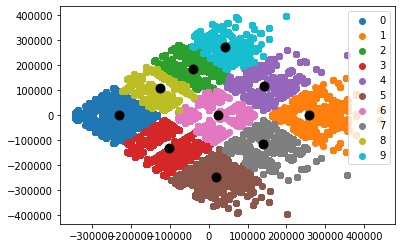

In [ ]:
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()